# kaggle bike_sharing (arima 사용)

In [23]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [10]:
train  = pd.read_csv("train.csv",parse_dates=["datetime"])
test = pd.read_csv('test.csv')
sub_df = pd.read_csv("SampleSubmission.csv")

In [11]:
train_2 = train[['datetime','count']] # 필요한 칼럼만 사용

In [12]:
train_2.head()

,datetime,count
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


In [15]:
train_2 = train_2.set_index('datetime').groupby(pd.Grouper(freq='D')).sum()
train_2.head() # 일데이터로 바꾸기

,count
datetime,
2011-01-01,985
2011-01-02,801
2011-01-03,1349
2011-01-04,1562
2011-01-05,1600


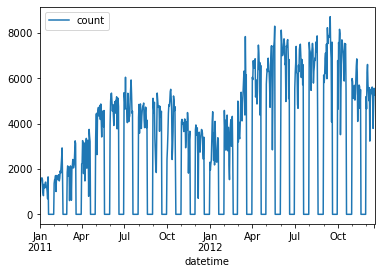

In [16]:
train_2.plot()
plt.show()

- 20~말일 데이터가 없어서 이모양이 나왔다

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


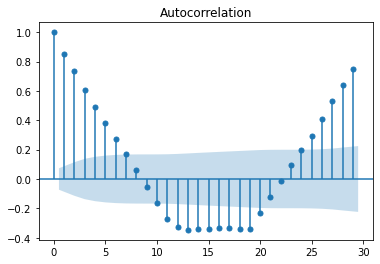

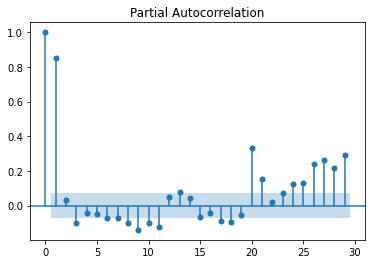

<Figure size 720x144 with 0 Axes>

In [17]:
plot_acf(train_2)
plot_pacf(train_2)
plt.figure(figsize = (10,2))
plt.show()

In [18]:
model = ARIMA(train_2, order=(2,1,3))

model_fit = model.fit(trend='nc', full_output=True, disp=True)
print(model_fit.summary())

C:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\

                             ARIMA Model Results                              
Dep. Variable:                D.count   No. Observations:                  718
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6160.827
Method:                       css-mle   S.D. of innovations           1281.716
Date:                Tue, 18 May 2021   AIC                          12333.653
Time:                        18:07:19   BIC                          12361.112
Sample:                    01-02-2011   HQIC                         12344.255
                         - 12-19-2012                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
ar.L1.D.count     1.8932      0.013    143.877      0.000       1.867       1.919
ar.L2.D.count    -0.9358      0.013    -69.551      0.000      -0.962      -0.909
ma.L1.D.count    -2.2331      0.018   -1

C:\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(

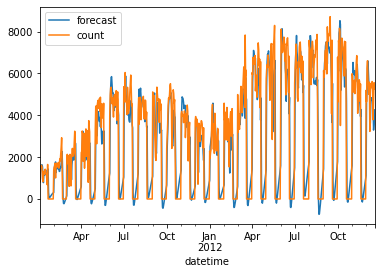

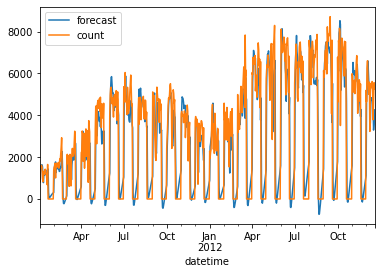

In [19]:
model_fit.plot_predict()

In [20]:
fore = model_fit.forecast(steps=1) #EPOCH같은거
print(fore)

(array([4184.2432765]), array([1281.71562317]), array([[1672.12681666, 6696.35973634]]))
